### Machine Learning and Optimization

Machine learning is a powerful tool for solving a wide range of problems, from simple pattern recognition to complex tasks, like image generation or interactive language models. Despite the diversity of these applications, they all share a common foundation, training a model by solving an optimization problem. This is where the "learning" in machine learning comes from.

At the heart of most machine learning models is a set of parameters. During training, these parameters are adjusted to minimize a specific **loss function**, which measures how well the model is performing on the task at hand. By iteratively optimizing this function, the model "learns" to make better predictions or decisions.

#### A Simple Optimization Algorithm: Gradient Descent

Let's start by learning a very simple optimization algorithm: **Gradient Descent**.
The idea is to use the derivative of the function, to move in the direction in which the function decreases.
$$
x_1 = x_0 - \gamma f'(x_0)
$$
Where $\gamma$ is a scalar known as **learning rate** as it plays a key role regulating how fast or slow the method converges to the minimum. A value too small makes the convergence slow, but a value too large can make the algorithm diverge. By repeatedly iterating using this update rule, $x_n$ converges to a minimum.


Let's try a simple example!

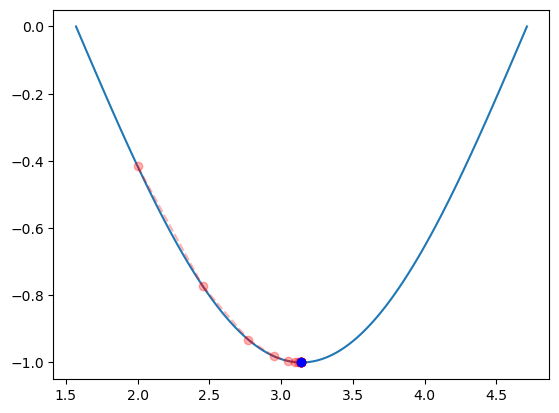

Our final guess is x = 3.1415911992507195


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# objective function we want to minimize
def function(x):
    # this function has a minimum at x = pi
    return np.cos(x)

def derivative(x):
    return -np.sin(x)


# initial value 
x0 = 2.

# define number of iterations
max_iterations = 20

#you can try different values of learning rate to see how it affects convergence (0.1, 0.5, 1., 1.5, 2. , 3.)
learning_rate = 0.5

# plot objective function
x = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
fig, ax = plt.subplots()
ax.plot(x, function(x))
# plot initial guess
ax.plot(x0, function(x0), 'ro', alpha = 0.3) 

# optimization loop
for i in range(max_iterations):
    # Newton's method update rule
    x1 = x0 - learning_rate * derivative(x0)
    # plot progress
    ax.plot(x1, function(x1), 'ro', alpha = 0.3) 
    ax.plot([x0, x1], [function(x0), function(x1)], 'r--', alpha = 0.3)
    # update guess
    x0 = x1

# plot final optimization
ax.plot(x0, function(x0), 'bo')
plt.show()

print(f'Our final guess is x = {x0}')

### Multivariate Optimization

When our objective function depends on multiple variables, as is often the case with machine learning models, the same approach can be used. However, now we have to take into account all the variables in our update rule:
$$
\mathbf{x}_{n + 1} = \mathbf{x}_n - \gamma \mathbf{\nabla} f(\mathbf{x}_n)
$$
Where $\gamma$ is a scalar known as **learning rate** as it plays a key role regulating how fast or slow the method converges to the minimum. A value too small makes the convergence slow, but a value too large can make the algorithm diverge.

Let's see a simple example!

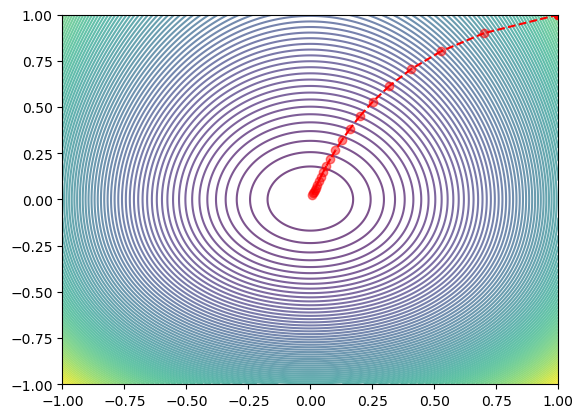

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# note that using a quadratic polynomial would make Newton's method Converge in one step
# you can try out different functions (be sure to plot the function near the minimum)

# objective function 
def function(x, y):
    return x**4 / 4 + x ** 2 + y ** 2 - y**3 / 3

# gradient of the function
def gradient(x, y):
    return np.array([x ** 3 + 2 * x, 2 * y - y**2])

# Initial guesses for Gradient Descent
x0 = np.array([1., 1.])
# learning rate
learning_rate = 0.1
# number of iterations
num_iterations = 20

# plot objective function using contour lines
X = np.linspace(-1., 1., 500)
Y = np.linspace(-1., 1., 500)
Z = np.array([[function(x, y) for x in X] for y in Y])

fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels = 100, alpha = 0.7)

#plot initial guess
ax.plot(x0[0], x0[1], 'ro')
# optimization loop
for _ in range(num_iterations):
    # GD update rule
    x1 = x0 - learning_rate * gradient(*x0)
    
    # plot progress
    ax.plot(x1[0], x1[1], 'ro', alpha = 0.5)
    ax.plot([x0[0], x1[0]], [x0[1], x1[1]], 'r--')
    
    # update guess
    x0 = x1

#use this to zoom in on the minimum
#ax.set_xlim([-0.2, 0.2])
#ax.set_ylim([-0.2, 0.2])
plt.show()



OPTIONAL

Explanation to introduce why oftentimes features are rescaled to help convergence during training + example code


### The Perceptron
Let's introduce our first simple machine learning model that we can train using Gradient Descent: the **Perceptron**.

The perceptron is a binary classifier that tries to separate data into two categories using a linear **decision boundary**. It divides the space into two regions using a plane, defined by the equation:
$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$
Here $\mathbf{w}$ is known as the **weights** of the perceptron and $b$ is the **bias**. Given the coordinates of a data point $x_i$, the perceptron classifies it by checking which side of the plane it falls on. This can be done using the following decision rule:
$$
y_{i} = \text{sign}(\mathbf{w} \cdot \mathbf{x}_i + b)
$$
If the result is positive, the model assigns it to one class, if it is negative, to the other.

Let's start by creating a random perceptron

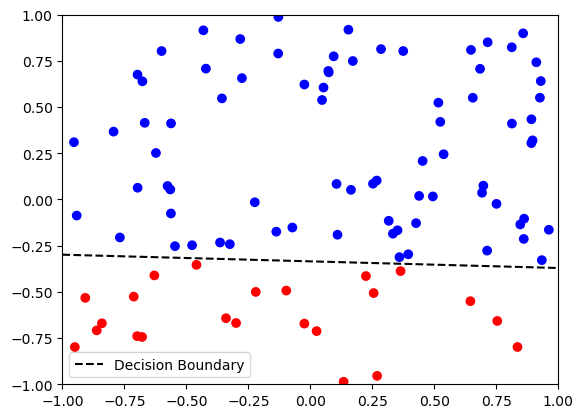

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#you can use this line to get reproducible results when using random numbers
#np.random.seed(0)

#define a function that applies linear classification
def Classify(x, w, b):
    return np.sign(np.dot(x, w) + b)

#equation of the plane on two dimensions for visualization purposes
def plane(x0, w, b):
    return -(w[0] * x0 + b) / w[1]

#%%---------------- Create a random data set-----------------------%%#
#number of features
n_features = 2
#random classifier
w = np.random.normal(size = n_features)
w /= np.linalg.norm(w)
b = np.random.normal()

#number of samples 
n_samples = 100
#create random points
X = np.random.uniform(-1, 1, size = (n_samples, n_features))
Y = Classify(X, w, b)

#%%---------------- Visualize data -----------------------%%#

fig, ax = plt.subplots()
#plot dara points
ax.scatter(X[:, 0], X[:, 1], c = (Y + 1) / 2, cmap = 'bwr')
#equation of the plane 
ax.plot([-1, 1], [plane(-1, w, b), plane(1, w, b)], 'k--', label = 'Decision Boundary')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
plt.legend()
plt.show()


### How do we train a perceptron?
*To avoid complicating notation we are going to redefine our inputs $\mathbf{x} \to \mathbf{x}' = (\mathbf{x}, 1)$ so that we can treat the bias as another weight.

Now, imagine we have a data set like the one we've just created, but we don't know the weights 
of the perceptron. If we start with some random weights we know that when a label doesn't match our prediction the following equation is met:
$$
y_i (\mathbf{w} \cdot \mathbf{x}_i) < 0
$$
Using this we can define a loss function:
$$
L = - y_i (\mathbf{w} \cdot \mathbf{x}_i)
$$
When all the data is labeled correctly our loss function is minimized. The gradient of our loss function will be:
$$
\mathbf{\nabla} L = - y_i \mathbf{x}_i
$$

Let's see this in work

Target classifier is [ 0.97421083  0.15348956 -0.1653911 ]
Trained classifier is [ 0.97012546  0.1621303  -0.1804726 ]
Similarity between target and trained is  0.9998


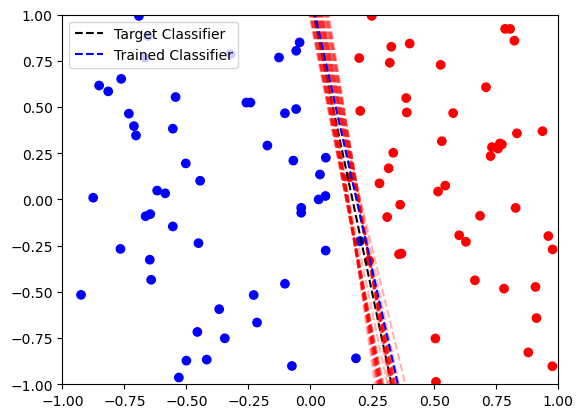

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#you can use this line to get reproducible results when using random numbers
#np.random.seed(0)

#define a function that applies linear classification
def Classify(x, w):
    return np.sign(np.dot(x, w))

#equation of the plane on two dimensions for visualization purposes
def plane(x0, w):
    return -(w[0] * x0 + w[2]) / w[1]

#%%---------------- Create a random data set-----------------------%%#
#number of features
n_features = 2
#random classifier
w_target = np.random.normal(size = n_features + 1)
w_target/= np.linalg.norm(w_target)
#number of samples 
n_samples = 100

X = np.random.uniform(-1, 1, size = (n_samples, n_features))
#add an extra dimenstion for the bias
X = np.concatenate((X, np.ones((n_samples, 1))), axis = -1)
Y = Classify(X, w_target)

#%%---------------- Train and visualize data -----------------------%%#

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = (Y + 1) / 2, cmap = 'bwr')
ax.plot([-1, 1], [plane(-1, w_target), plane(1, w_target)], 'k--', label = 'Target Classifier')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

#training parameters
learning_rate = 0.1
max_iterations = 100
#random initial classifier
w0 = np.random.normal(size = n_features + 1)
#counter for number of training steps done
num_steps = 0
for epoch in range(max_iterations):
    #flag that tells us when the training has converged
    has_converged = True
    for x, y in zip(X, Y):
        #check data wrongly classified
        if Classify(x, w0) * y == -1:
            num_steps += 1            
            has_converged = False
            #gradient descent step
            w0 += learning_rate * x * y
            #plot current classifier every n steps
            if num_steps % 5 == 0:
                ax.plot([-1, 1], [plane(-1, w0), plane(1, w0)], 'r--', alpha = 0.3)
    #break out of the loop when training has converged
    if has_converged:
        break

w0 /= np.linalg.norm(w0)
print(f'Target classifier is {w_target}')
print(f'Trained classifier is {w0}')
print(f'Similarity between target and trained is {np.dot(w_target, w0): .4f}')

ax.plot([-1, 1], [plane(-1, w0), plane(1, w0)], 'b--', label = 'Trained Classifier')
plt.legend()
plt.show()


### Support Vector Machines (SVM)

The perceptron is a very simple algorithm, but in practice, most datasets are not linearly separable.

Support Vector Machines (SVMs) address this by transforming the data into a higher dimensional space, where a linear separator might exist. This transformation is done using a **kernel function**.

Let’s look at an intuitive example to understand this idea.

#### Toy Problem: Mosquito vs frog

Imagine we’re trying to predict whether a mosquito will survive an encounter with a frog based on its position.
We collect some data showing the positions of mosquitoes that survived and those that didn’t:

<img src="Frog.png" width="500"/>
    
Looking at this data in two dimensions $(x, y)$, we can esaly see that it’s not linearly separable. No straight line can separate the survivor points from the rest.

However, if we transform the input features into a higher dimensional space using:
$$
(x, y) \rightarrow (x^2, y^2, xy, x, y)
$$

the data becomes linearly separable!

Luckily for us the library scikit-learn, already has an implementation of SVMs that is easy to use with just a few lines of code.


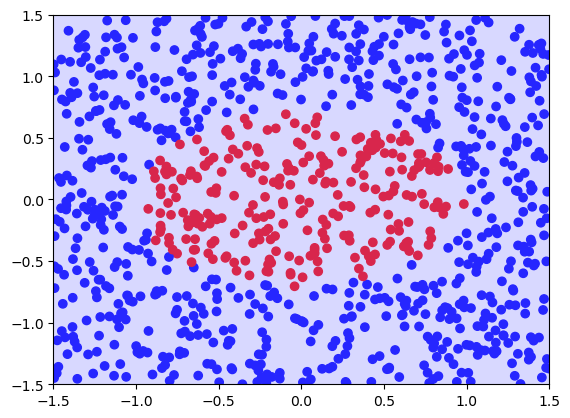

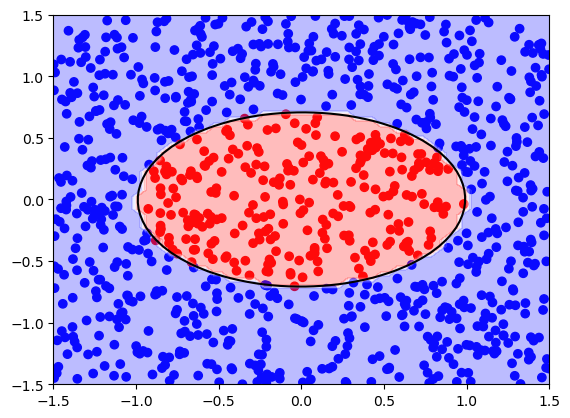

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

#dummy data classification
def Classify(x, r = 1):
    x = np.atleast_2d(x)
    y = ((x[:, 0] **2 + 2 * x[:, 1] **2) < r**2).astype(int)
    return y

X = np.random.uniform(-1.5, 1.5, (1000, 2))
y = Classify(X)

#this is a linear classifier so it won't work
svcLinear = SVC(C = 10, kernel = 'linear')
svcLinear.fit(X, y)


fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'bwr')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

#this is a function from scikit learn that allows us to visualize decision boundaries
DecisionBoundaryDisplay.from_estimator(estimator = svcLinear, X = X, ax = ax, response_method="predict", alpha=0.3, cmap = 'bwr')
DecisionBoundaryDisplay.from_estimator(estimator = svcLinear, X = X, ax = ax, response_method="decision_function", plot_method="contour",
    levels=[0], colors=["k"], linestyles=["-"])

plt.show()

#now let's try a quadratic kernel
svcQuadratic = SVC(C = 10, kernel = 'poly', degree = 2)
svcQuadratic.fit(X, y)


fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'bwr')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

DecisionBoundaryDisplay.from_estimator(estimator = svcQuadratic, X = X, ax = ax, response_method="predict", alpha=0.3, cmap = 'bwr')
DecisionBoundaryDisplay.from_estimator(estimator = svcQuadratic, X = X, ax = ax, response_method="decision_function", plot_method="contour",
    levels=[0], colors=["k"], linestyles=["-"])

plt.show()



### Final Notes on SVMs

This change of variables works for this particular problem, but how do we know which transformation to use for a given dataset?

Fortunately, there are several commonly used kernel functions available. You can find them in the [scikit-learn SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Some of the most common kernels include:
- **Linear kernel** (for linearly separable data)
- **Polynomial kernel**
- **RBF (Radial Basis Function)** (often effective when we don't have prior knowledge about the data distribution)
- **Sigmoid kernel**

Many kernels come with extra parameters such as:
- `degree` for polynomial kernels
- `gamma` which controls how much the decision boundary overfits the training data
- `C` a regularization parameter that allows the method to converge even when there are outliers in the data.

These are known as **hyperparameters**, because unlike the model's weights, they are not directly optimized during training.

In [ ]:
#maybe insert example with a sklearn data set where they can test different kernels.

### Multilayer Perceptron (MLP)

Support Vector Machines are already powerful and flexible models. However, they rely heavily on the choice of kernel, which acts as a predefined change of variables. This raises a natural question:

**Can we learn the best change of variables directly from the data?**

The answer is yes, and this is the key idea behind neural networks. We can use perceptrons to construct new features by applying non-linear transformations to the input:

$$
z_{1} = h(\mathbf{w}_1 \cdot \mathbf{x} + b_1)
$$
$$
z_{2} = h(\mathbf{w}_2 \cdot \mathbf{x} + b_2)
$$

Before, we used the **sign** function to make a binary decision. But here, since we’re building intermediate features, we want a smooth and continuous variable, so insted we use a generic non-linear function \( h \) commonly known as the **activation function**.

Then, we can combine these features to make a final prediction:

$$
\text{sign}(\mathbf{w}_3 \cdot \mathbf{z} + b_3)
$$

This structure is called a **Multilayer Perceptron (MLP)**. It consists of an **input layer**, one or more **hidden layers**, and an **output layer**.

*Insert image of a simple MLP with input → hidden layer → output*

#### What Advantages Does This Offer?

1. **Trainable Feature Transformation**:  
   Unlike SVMs, where the kernel and the hyperparameters are fixed in advance, MLPs learn both the feature transformation and the classification boundary together. All weights in the network are trainable using gradient-based methods. This is made possible by a technique called **backpropagation**, which uses the chain rule to compute gradients efficiently across layers.

2. **Universal Approximation Theorem**:  
   A neural network with just a single hidden layer (and enough neurons) can approximate any continuous function on a compact domain. This means MLPs are theoretically capable of solving any problem, given enough capacity and data.

3. **Depth Matters**:  
   While one hidden layer is sufficient in theory, in practice using **multiple layers** often leads to better performance. Each layer can be seen as learning a progressively higher-level representation of the data.

*Insert image of a deeper neural network with multiple hidden layers*

Neural networks provide a powerful and flexible framework for learning complex patterns in data. Let's see them in action!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier






### Other algorithms
By now we already know how to use some simple algorithms...

Explanation on how to look documenation of scikit learn to use the different models, they all use the same scheme fit/predict + resources for the different 



In [ ]:
#insert example using different sklearn models

OPTIONAL
### Training a MultiLayer Perceptron with pytorch
Some text to introduce pytorch library, and different built in data sets +  example of pytorch for one of the dataset, like the MNIST for digit recognition

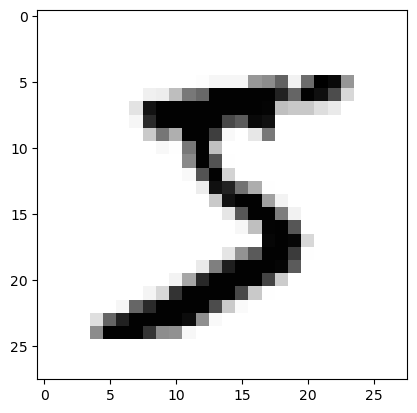

In [12]:
import numpy as np
import torch
import torch.nn 
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import os

data_path = os.path.join(os.getcwd(), 'DataSets')
if not os.path.exists(data_path): os.makedirs(data_path)
    
data = MNIST(root = data_path, download = True)

plt.imshow(np.asarray(data[0][0]), cmap = 'Greys')
plt.show()
